In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
#Importing Data Set
df = pd.read_csv("/content/co2_emission.csv")
df.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


Data Preprocessing

In [5]:
df.rename(columns = {"Entity": "Country", "Annual CO₂ emissions (tonnes )": "CO₂_emissions(tonnes)"}, inplace = True)
df

,Country,Code,Year,CO₂_emissions(tonnes)
0,Afghanistan,AFG,1949,14656.00
1,Afghanistan,AFG,1950,84272.00
2,Afghanistan,AFG,1951,91600.00
3,Afghanistan,AFG,1952,91600.00
4,Afghanistan,AFG,1953,106256.00
...,...,...,...,...
20848,Zimbabwe,ZWE,2013,11536239.29
20849,Zimbabwe,ZWE,2014,11866348.41
20850,Zimbabwe,ZWE,2015,10907603.94
20851,Zimbabwe,ZWE,2016,9932649.88


In [6]:
df.isnull().sum()

Country                     0
Code                     2207
Year                        0
CO₂_emissions(tonnes)       0
dtype: int64

In [7]:
df.drop("Code", axis = 1, inplace = True)
df.head()

,Country,Year,CO₂_emissions(tonnes)
0,Afghanistan,1949,14656.0
1,Afghanistan,1950,84272.0
2,Afghanistan,1951,91600.0
3,Afghanistan,1952,91600.0
4,Afghanistan,1953,106256.0


In [8]:
df.columns

Index(['Country', 'Year', 'CO₂_emissions(tonnes)'], dtype='object')

In [ ]:
df.dtypes

Country                   object
Year                       int64
CO₂_emissions(tonnes)    float64
dtype: object

Data Analysis and Visualization

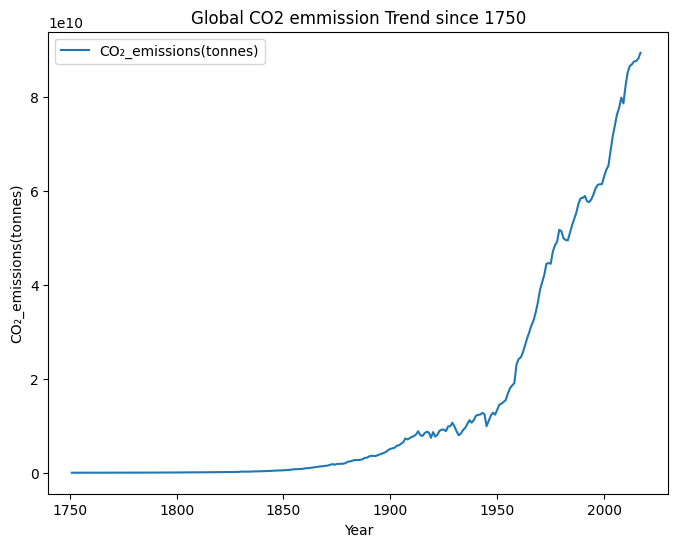

In [64]:
#Increase in CO2 Emissions since 1750
df_year = df.groupby(["Year"])[["CO₂_emissions(tonnes)"]].sum()
xmin = 1740
xmax = 2030
df_year.plot(kind = "line", figsize = (8,6), xlim = (xmin, xmax))
plt.title("Global CO2 emmission Trend since 1750")
plt.xlabel("Year")
plt.ylabel("CO₂_emissions(tonnes)")
plt.show()

In [10]:
# Top 10 Contributors of CO2_ Emissions based on Total Emissions since
df_country = df.groupby(["Country"])[["CO₂_emissions(tonnes)"]].sum()
dftop10 = df_country.sort_values(by ="CO₂_emissions(tonnes)", ascending = True ).drop(["World"]).tail(10)
dftop10

,CO₂_emissions(tonnes)
Country,
Japan,6.230461e+10
United Kingdom,7.707106e+10
Germany,9.056563e+10
Americas (other),9.864116e+10
Russia,1.005891e+11
Europe (other),1.575402e+11
Asia and Pacific (other),1.780573e+11
China,2.001365e+11
EU-28,3.528583e+11


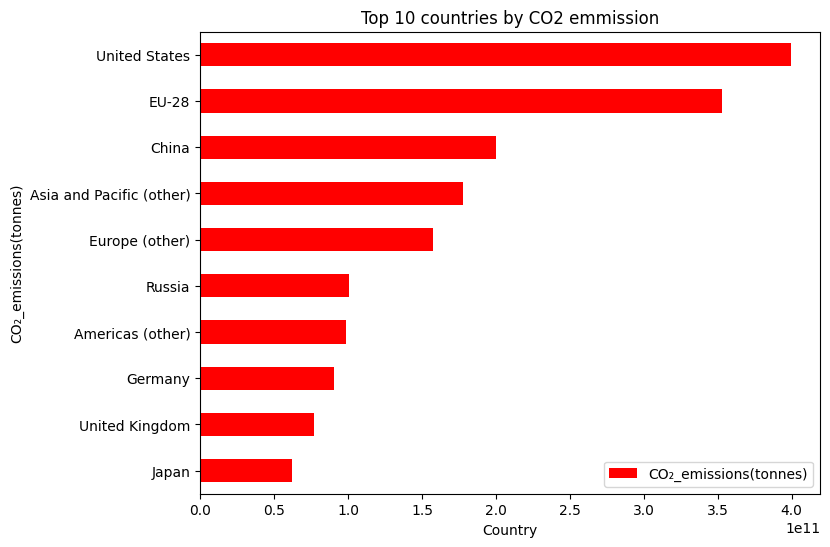

In [11]:
dftop10.plot(kind ="barh", figsize = (8, 6), color = "red")
plt.title("Top 10 countries by CO2 emmission")
plt.xlabel("Country")
plt.ylabel("CO₂_emissions(tonnes)")
plt.show()

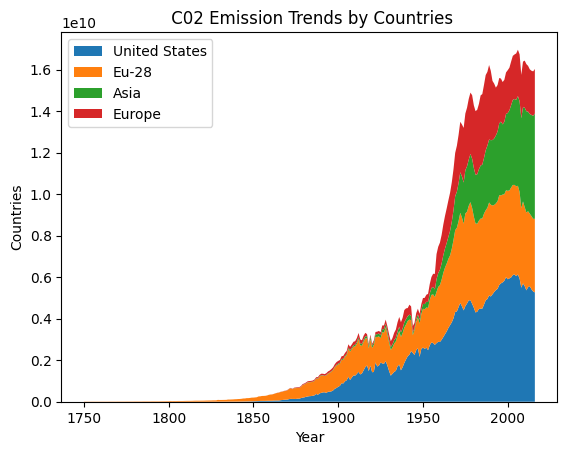

In [60]:
#CO2 Emission Trends for Top contributing Countries
import numpy as np
#x = df_us["Year"]
x1 = np.arange(1750,2017)
y1 = df_us["CO₂_emissions(tonnes)"]
y2 = df_EU["CO₂_emissions(tonnes)"]
y3 = df_China["CO₂_emissions(tonnes)"]
y4 = df_Asia["CO₂_emissions(tonnes)"]
y5 =df_Europe["CO₂_emissions(tonnes)"]
plt.stackplot(x1,y1,y2,y4,y5, labels = ("United States", "Eu-28","Asia", "Europe"))
plt.legend(loc = "upper left")
plt.title(" C02 Emission Trends by Countries")
plt.xlabel("Year" )
plt.ylabel("Countries")
plt.show()


[5269529513.0, 3543683484.0, 9838754028.0, 5071156099.0, 2149072913.0]


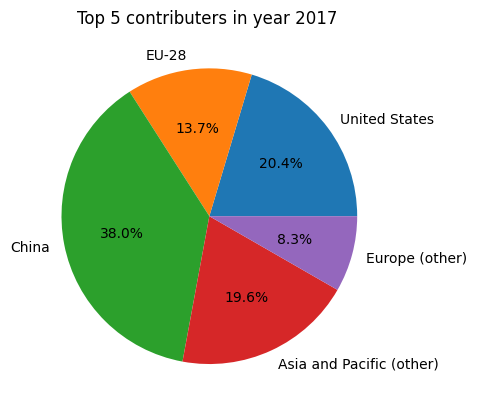

In [48]:
# Top 5 contributers of CO2 Emissions in year 2017
Country = ["United States", "EU-28", "China", "Asia and Pacific (other)", "Europe (other)"]
df_us  = df[df["Country"] == "United States"][["Year", "CO₂_emissions(tonnes)"]]
df_us.set_index('Year', inplace=True)
df_EU  = df[df["Country"] == "EU-28"][["Year", "CO₂_emissions(tonnes)"]]
df_EU.set_index('Year', inplace=True)
#print (df_EU)
df_China  = df[df["Country"] == "China"][["Year", "CO₂_emissions(tonnes)"]]
df_China.set_index('Year', inplace=True)
df_Asia  = df[df["Country"] == "Asia and Pacific (other)"][["Year", "CO₂_emissions(tonnes)"]]
df_Asia.set_index('Year', inplace=True)
df_Europe = df[df["Country"] == "Europe (other)"][["Year", "CO₂_emissions(tonnes)"]]
df_Europe.set_index('Year', inplace=True)
x1 = df_years_us = df_us.loc[2017, "CO₂_emissions(tonnes)" ]
x2 = df_years_EU = df_EU.loc[2017, "CO₂_emissions(tonnes)"]
x3 = df_years_China = df_China.loc[2017, "CO₂_emissions(tonnes)"]
x4 = df_years_Asia = df_Asia.loc[2017, "CO₂_emissions(tonnes)"]
x5 = df_years_Europe = df_Europe.loc[2017, "CO₂_emissions(tonnes)"]
x = [x1,x2,x3,x4,x5]
print (x)
plt.pie(x, labels = Country, autopct='%1.1f%%')
plt.title("Top 5 contributers in year 2017 ")
#plt.ylabel("Countries")
plt.show()